In [ ]:
#Author: Mark Warren
#Date: 28/01/2024
#Purpose: To analyse Groceries in Tescos (UK) data

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('../input/tesco-uk-groceries-dataset/tesco_groceries_dataset.csv')

# Data Understanding

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.describe()

# Data Preparation

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df = df[['name',
    'description', 
    'breadcrumbs',
    'availability',
    'price', 
    'brand',
    'avg_rating',
    'reviews_count'
    ]].copy() 
    
    #'url', 'sku', 'gtin13', 
    #'currency', 
    #'images', 
    #'pack_size', 'ingredients', 'storage_details',
    #'product_origin', 'percentage_alcohol', 'serving_size', 'nutrition',
    #'uniq_id', 'scraped_at'

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df = df.rename(columns={'name':'Name',
                    'description':'Description', 
                    'breadcrumbs':'Type',
                    'availability':'Status',
                    'price':'Price', 
                    'brand':'Brand',
                    'avg_rating':'Average_Rating',
                    'reviews_count':'Number_Of_Reviews'})

In [ ]:
df.isna().sum()

In [ ]:
df.loc[df.duplicated()]

In [ ]:
df.duplicated(subset=['Name']).sum()

# Feature Understanding

In [ ]:
df.head()

In [ ]:
df['Price'].value_counts() \
    .head(10)

In [ ]:
ax1 = df['Price'].value_counts() \
    .head(10) \
    .plot(kind='bar', title ='Most Common Prices')
ax1.set_xlabel('Prices (£)')
ax1.set_ylabel('Number of Items')
plt.show()

In [ ]:
ax2 = df['Number_Of_Reviews'].sort_values(ascending=False) \
    .head(10) \
    .plot(kind='bar',title='Top 10 Most Reviewed Items')

ax2.set_xlabel('Item')
ax2.set_ylabel('Amount')
plt.show()

In [ ]:
ax3 = df['Status'].value_counts()
ax3 = plt.pie(ax3,labels=ax3.index, autopct='%2.2f%%')
plt.title(label='Overall Stock Status')
plt.show()

In [ ]:
ax4= df['Brand'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Most Common Brand Items')
ax4.set_ylabel('Amount')
plt.show()

In [ ]:
ax5 = df['Average_Rating'].value_counts() \
    .head(10)
ax5 = plt.pie(ax5,labels=ax5.index,autopct='%2.1f%%')
plt.title(label='Most Common Average Ratings')
plt.show()

In [ ]:
ax6= df['Type'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Common Types')
ax6.set_ylabel('Amount')
plt.show()

# Feature Relationships

In [ ]:
df.columns

In [ ]:
sns.pairplot(df, vars=['Status', 'Price',
       'Average_Rating', 'Number_Of_Reviews'])
plt.show()

In [ ]:
df_corr = df[['Price','Average_Rating', 'Number_Of_Reviews']].dropna().corr()
df_corr

In [ ]:
sns.heatmap(df_corr)

# What Brands are the best rated?

Text(0.5, 0, 'Count/Rating')

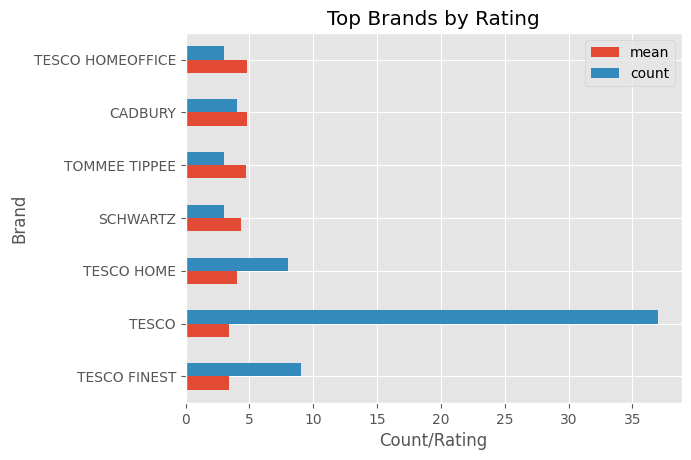

In [326]:
ax7= df.groupby('Brand')['Average_Rating'] \
    .agg(['mean','count']) \
    .query('count >= 3') \
    .sort_values('mean') \
    .plot(kind='barh', title='Top Brands by Rating')
ax7.set_xlabel('Count/Rating')